# U.S. Medical Insurance Costs

This Medical Insurance dataset is from Codecademy's Data Scientist Portfolio Project. 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
#define some helper functions to transform the data
def string_to_binary(old_list, one_val):
    new_list = []
    for item in old_list:
        if item.lower() == one_val:
            new_list.append(1)
        else:
            new_list.append(0)
    return new_list

def make_pct(number, digits):
    return round(number * 100, digits)


def summarize_numeric_data(df_col):
    average = round(df_col.mean(), 2)
    median = round(df_col.median(), 2)
    std = round(df_col.std(), 2)
    maximum = round(df_col.max(),2)
    minimum = round(df_col.min(),2)
    return "Average: {}, Median: {}, Standard Deviation: {}, Max: {}, Min: {}".format(average, median, std, maximum, minimum)

def get_percentages(df, col, vals):
    output = {}
    total = len(df)
    for val in vals:
        num = len(df[df[col] == val])
        pct = make_pct(num/total, 2)
        output[val] = [num, pct]
    return output


In [3]:
#import the csv data
dtypes = {
    'age': np.int64,
    'sex': np.str,
    'bmi': np.float64,
    'children': np.int64,
    'smoker': np.str,
    'region': np.str,
    'charges': np.float64
}

insurance_costs = pd.read_csv('insurance.csv', dtype=dtypes)

In [4]:
#modify sex and smoker status to be binary not strings
insurance_costs['smoker'] = string_to_binary(insurance_costs['smoker'], 'yes')
insurance_costs['sex'] = string_to_binary(insurance_costs['sex'], 'male')

In [5]:
print(insurance_costs)

      age  sex     bmi  children  smoker     region      charges
0      19    0  27.900         0       1  southwest  16884.92400
1      18    1  33.770         1       0  southeast   1725.55230
2      28    1  33.000         3       0  southeast   4449.46200
3      33    1  22.705         0       0  northwest  21984.47061
4      32    1  28.880         0       0  northwest   3866.85520
...   ...  ...     ...       ...     ...        ...          ...
1333   50    1  30.970         3       0  northwest  10600.54830
1334   18    0  31.920         0       0  northeast   2205.98080
1335   18    0  36.850         0       0  southeast   1629.83350
1336   21    0  25.800         0       0  southwest   2007.94500
1337   61    0  29.070         0       1  northwest  29141.36030

[1338 rows x 7 columns]


In [6]:
#lets get some information about the dataset
def summarize_dataset(df):
    
    sex_pcts = get_percentages(df, 'sex', [1,0])
    smoker_pcts = get_percentages(df, 'smoker', [1,0])
    region_pcts = get_percentages(df, 'region', ['northwest', 'northeast', 'southeast', 'southwest'])
    age = summarize_numeric_data(df['age'])
    bmi = summarize_numeric_data(df['bmi'])
    children = summarize_numeric_data(df['children'])
    charge = summarize_numeric_data(df['charges'])

    #print outputs
    print('SUMMARY BY COLUMN:')
    print("Sex: ")
    print("Number of Males: {}, Percent Male: {}".format(sex_pcts[1][0],sex_pcts[1][1]))
    print("Number of Females: {}, Percent Female: {}".format(sex_pcts[0][0],sex_pcts[0][1]))
    print("Smoker: ")
    print("Number of Smoker: {}, Percent Smoker: {}".format(smoker_pcts[1][0],smoker_pcts[1][1]))
    print("Number of Non-smoker: {}, Percent Non-smoker: {}".format(smoker_pcts[0][0],smoker_pcts[0][1]))
    print("Region: ")
    print("Number in NW: {}, Percent NW: {}".format(region_pcts['northwest'][0],region_pcts['northwest'][1]))
    print("Number in NE: {}, Percent NE: {}".format(region_pcts['northeast'][0],region_pcts['northeast'][1]))
    print("Number in SE: {}, Percent SE: {}".format(region_pcts['southeast'][0],region_pcts['southeast'][1]))
    print("Number in SW: {}, Percent SW: {}".format(region_pcts['southwest'][0],region_pcts['southwest'][1]))
    print('\n'.join(['Age:', age, 'BMI:', bmi, 'Children:', children, 'Charges:' ,charge]))
    
summarize_dataset(insurance_costs)


SUMMARY BY COLUMN:
Sex: 
Number of Males: 676, Percent Male: 50.52
Number of Females: 662, Percent Female: 49.48
Smoker: 
Number of Smoker: 274, Percent Smoker: 20.48
Number of Non-smoker: 1064, Percent Non-smoker: 79.52
Region: 
Number in NW: 325, Percent NW: 24.29
Number in NE: 324, Percent NE: 24.22
Number in SE: 364, Percent SE: 27.2
Number in SW: 325, Percent SW: 24.29
Age:
Average: 39.21, Median: 39.0, Standard Deviation: 14.05, Max: 64, Min: 18
BMI:
Average: 30.66, Median: 30.4, Standard Deviation: 6.1, Max: 53.13, Min: 15.96
Children:
Average: 1.09, Median: 1.0, Standard Deviation: 1.21, Max: 5, Min: 0
Charges:
Average: 13270.42, Median: 9382.03, Standard Deviation: 12110.01, Max: 63770.43, Min: 1121.87


<AxesSubplot:xlabel='age', ylabel='charges'>

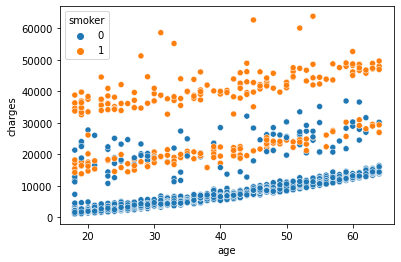

In [7]:
sns.scatterplot(data=insurance_costs, x='age', y='charges', hue='smoker')

<AxesSubplot:xlabel='children', ylabel='charges'>

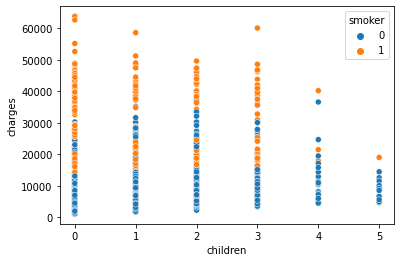

In [8]:
sns.scatterplot(data=insurance_costs, x='children', y='charges', hue='smoker')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

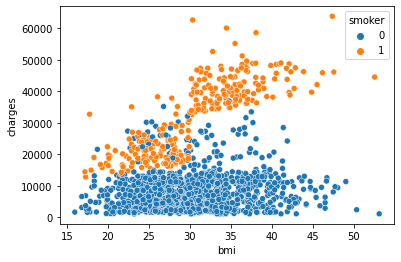

In [9]:
sns.scatterplot(data=insurance_costs, x='bmi', y='charges', hue='smoker')

<AxesSubplot:xlabel='region', ylabel='charges'>

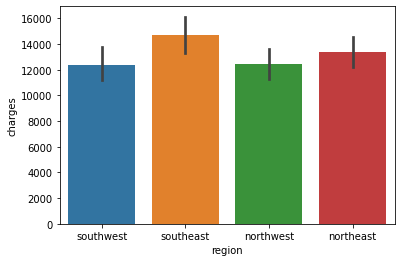

In [10]:
sns.barplot(data=insurance_costs, x='region', y='charges')

<AxesSubplot:xlabel='region', ylabel='age'>

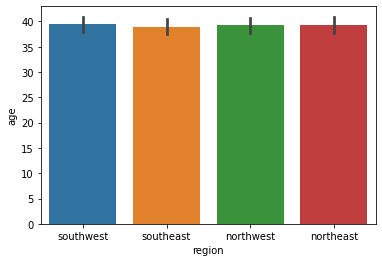

In [11]:
sns.barplot(data=insurance_costs, x='region', y='age')

<AxesSubplot:xlabel='region', ylabel='bmi'>

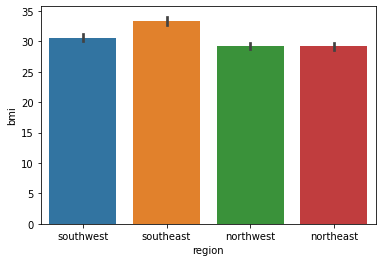

In [12]:
sns.barplot(data=insurance_costs, x='region', y='bmi')

<AxesSubplot:xlabel='region', ylabel='smoker'>

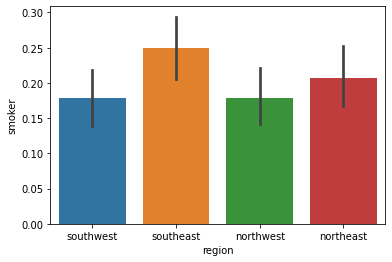

In [13]:
sns.barplot(data=insurance_costs, x='region', y='smoker')

<AxesSubplot:xlabel='sex', ylabel='charges'>

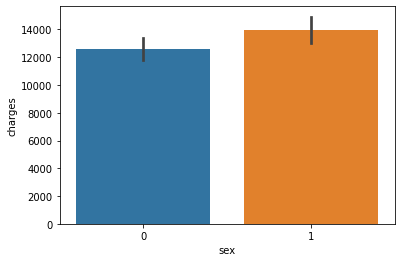

In [14]:
sns.barplot(data=insurance_costs, x='sex', y='charges')

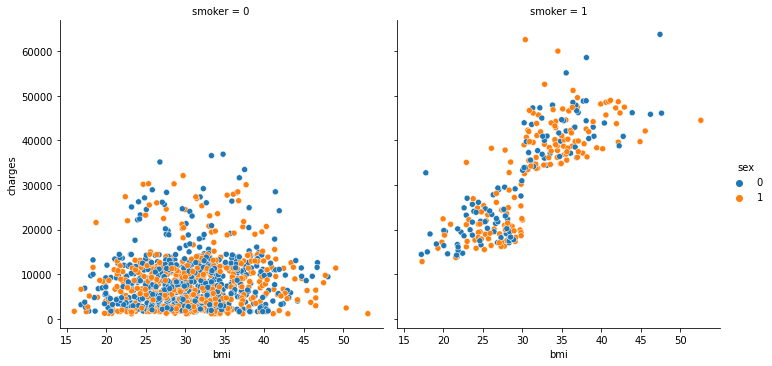

In [15]:
#modified from seaborn docs
sns.relplot(
    data=insurance_costs, x="bmi", y="charges",
    col="smoker", hue="sex",
    kind="scatter"
)

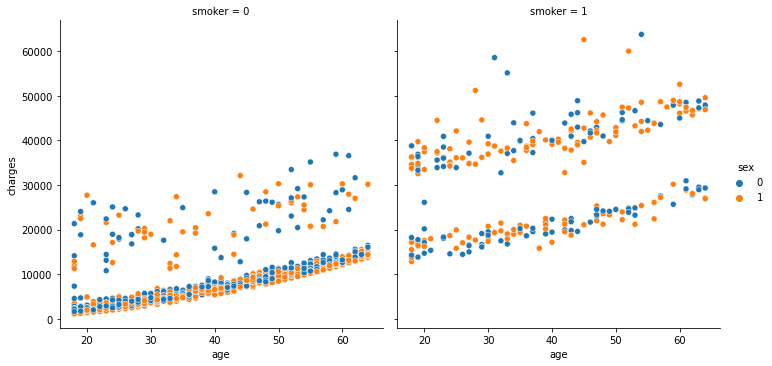

In [16]:
#modified from seaborn docs
sns.relplot(
    data=insurance_costs, x="age", y="charges",
    col="smoker", hue="sex",
    kind="scatter"
)

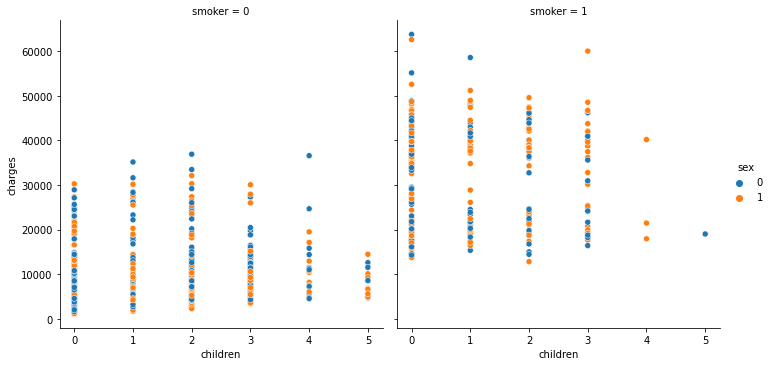

In [17]:
#modified from seaborn docs
sns.relplot(
    data=insurance_costs, x="children", y="charges",
    col="smoker", hue="sex",
    kind="scatter"
)

In [37]:
#Regression to predict insurance costs
model = LinearRegression()
X = insurance_costs.drop(['charges', 'region'], axis=1).to_numpy()
Y = insurance_costs['charges']
trainX ,testX, trainY, testY = train_test_split(X, Y)
model.fit(trainX, trainY)
model.score(testX, testY)
predictions = model.predict(testX)

<AxesSubplot:xlabel='charges'>

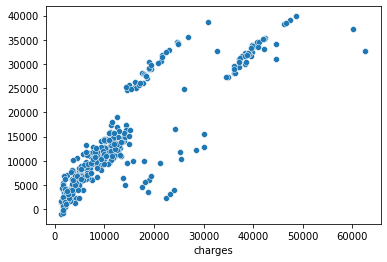

In [41]:
sns.scatterplot(testY, predictions)

# Conclusions
Based on the above charts and the summary statistics, smoking, increased age, being male, high BMI are associated with higher insurance costs. The Southeast region has more smokers and higher average BMI, and it also has the highest average insurance charges. BMI only appears to be associated with insurance charges with smokers. Age is associated without regard to smoking habits. Having children seems to lower insurance costs as the number of children increases.